## Analysis of 2020 Presidential Primary Poll - Which Dem fares best?
This notebook attempts to visualize a dataset that polls the voting preferences of 38 demographic groups in a hypothical general election. It includes democratic candidates Joe Biden, Bernie Sanders, & Beto O'Rourke facing off against Donald Trump. There are three questions, one for each pairing: If the 2020 presidential election was held today who would you vote for? The response is either the democratic candidate, 'Donald Trump', or 'Too Early for me to say'.

In this analysis, I reduce the data into 'spreads' of the percentage voting for the democratic candidate over Donald Trump. I further translate this into a 'confidence score' by dividing the spread by the percentage of voters who did not choose a candidate. Inti A large positive spread with a small percentage of uncertainty should indicate a highly confident prediction of the democratic candidate winning. Conversely, a small negative spread with a large percentage of undecided voter is a very weak case for Trump holding that group.

My source was The Hill-HarrisX daily poll features [here](https://thehill.com/hilltv/what-americas-thinking/422768-new-poll-suggests-progressive-voters-arent-worried-that-biden). From the website:

_"This survey was conducted online within the United States from December 16-17, 2018 among 1,001 registered voters by HarrisX.  The sampling margin of error of this poll is plus or minus 3.1 percentage points. The results reflect a nationally representative sample of registered voters. Results were weighted for age within gender, region, race/ethnicity, income, political party, and education where necessary to align them with their actual proportions in the population."_

### 1) Loading and organizing the data
    - Read csv file
    - Manipulate Dataframe into useful format
    - Compute 'spread' and 'confidence score' values
    - Quick visulization of overall trend

In [1]:
# Read the csv file
import pandas as pd 
file = '/Users/jamesfrancis/Documents/Data Projects/2020_poll/2020_data_pct.csv'
df_2020 = pd.read_csv(file,encoding='latin-1',index_col=0)

# Drop the '%' signs
for col in list(df_2020.columns):
    df_2020[col] = [x.strip('%') for x in df_2020[col]]

# Swap index and columns
df_2020 = df_2020.transpose().astype(int)
df_2020.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, Total to Strong conservative
Data columns (total 9 columns):
1. Donald Trump               38 non-null int64
1. Joe Biden                  38 non-null int64
1. Too early for me to say    38 non-null int64
2. Donald Trump               38 non-null int64
2. Bernie Sanders             38 non-null int64
2. Too early for me to say    38 non-null int64
3. Donald Trump               38 non-null int64
3. Beto OÕRourke              38 non-null int64
3. Too early for me to say    38 non-null int64
dtypes: int64(9)
memory usage: 4.2+ KB


In [2]:
# Peek at dataframe containing voting percentages for three
# hypothetical scenarios for 2020 general election
df_2020

,1. Donald Trump,1. Joe Biden,1. Too early for me to say,2. Donald Trump,2. Bernie Sanders,2. Too early for me to say,3. Donald Trump,3. Beto OÕRourke,3. Too early for me to say
Total,36,42,22,37,38,24,37,30,34
Male,42,35,24,41,34,25,43,25,32
Female,31,48,20,34,43,24,31,34,36
18-34,25,43,31,27,46,26,28,33,39
35-49,33,45,23,32,43,24,32,32,36
50-64,47,37,16,47,31,23,46,27,27
65+,41,43,17,43,33,24,41,25,34
Gen Z,8,60,33,9,60,32,19,38,42
Millennials,28,42,31,30,46,25,28,34,37
Gen X,36,42,22,34,40,26,35,30,35


In [3]:
# Compute the spreads of democratic candidates over Trump
# spread = (% Dem - % Trump)
# Positive values indi
biden_trump_sprd = df_2020['1. Joe Biden'] - df_2020['1. Donald Trump'] 
sanders_trump_sprd = df_2020['2. Bernie Sanders'] - df_2020['2. Donald Trump'] 
beto_trump_sprd = df_2020['3. Beto OÕRourke'] - df_2020['3. Donald Trump'] 
# combine these into an new df with spreads instead
df_spread = pd.DataFrame(data=[biden_trump_sprd,sanders_trump_sprd,beto_trump_sprd],index=['biden-trump','sanders-trump','beto-trump']).transpose()
df_spread

,biden-trump,sanders-trump,beto-trump
Total,6,1,-7
Male,-7,-7,-18
Female,17,9,3
18-34,18,19,5
35-49,12,11,0
50-64,-10,-16,-19
65+,2,-10,-16
Gen Z,52,51,19
Millennials,14,16,6
Gen X,6,6,-5


In [4]:
# Create alternate dataset to incorporate the uncertainty of voters
# confidence score = (% Dem - % Trump) / (% "Too early to say")
# There are some instances where the scale of this score is very wide (>700),
#    in which case I may present it as a log scale.
df_conf = pd.DataFrame()
df_conf['biden-trump'] = 100*df_spread['biden-trump']/df_2020['1. Too early for me to say']
df_conf['sanders-trump'] = 100*df_spread['sanders-trump']/df_2020['2. Too early for me to say']
df_conf['beto-trump'] = 100*df_spread['beto-trump']/df_2020['3. Too early for me to say']
df_conf

,biden-trump,sanders-trump,beto-trump
Total,27.272727,4.166667,-20.588235
Male,-29.166667,-28.000000,-56.250000
Female,85.000000,37.500000,8.333333
18-34,58.064516,73.076923,12.820513
35-49,52.173913,45.833333,0.000000
50-64,-62.500000,-69.565217,-70.370370
65+,11.764706,-41.666667,-47.058824
Gen Z,157.575758,159.375000,45.238095
Millennials,45.161290,64.000000,16.216216
Gen X,27.272727,23.076923,-14.285714


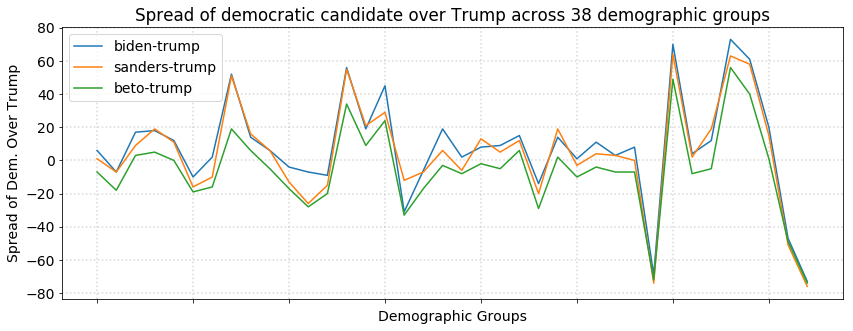

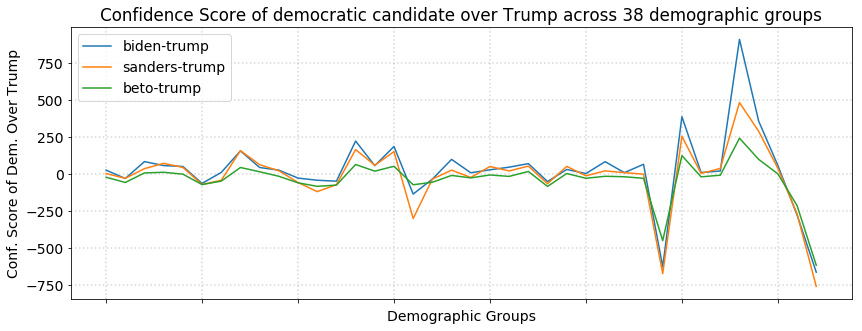

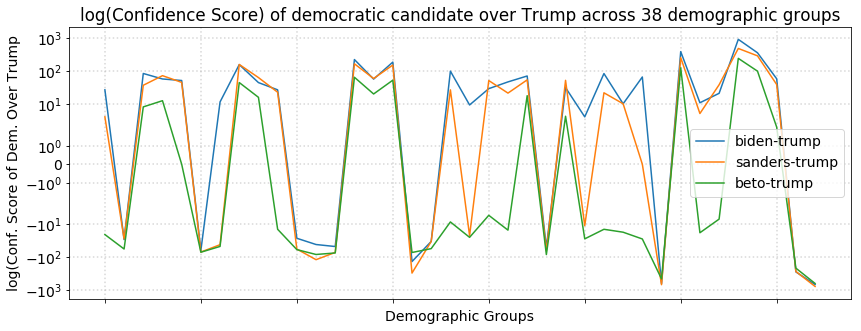

In [5]:
# quick visual of the three matchups across 38 demographic groups
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14,'figure.figsize':(14,5),'axes.grid':'true',
                            'grid.linestyle':':','grid.linewidth':1.5,'grid.alpha':.5})
df_spread.plot()
plt.title('Spread of democratic candidate over Trump across 38 demographic groups')
plt.xlabel('Demographic Groups')
plt.ylabel('Spread of Dem. Over Trump')
plt.show()

df_conf.plot()
plt.title('Confidence Score of democratic candidate over Trump across 38 demographic groups')
plt.xlabel('Demographic Groups')
plt.ylabel('Conf. Score of Dem. Over Trump')
plt.show()

df_conf.plot()
plt.title('log(Confidence Score) of democratic candidate over Trump across 38 demographic groups')
plt.xlabel('Demographic Groups')
plt.ylabel('log(Conf. Score of Dem. Over Trump')
plt.yscale('symlog')
plt.show()

#### -> Interpretation
- There is a clear trend that suggests that voters tend to vote according to a party, regardless of candidate.
- However, there are also deviations (the wide gaps) that suggest certain demographics favor specific democratic candidates more that others. This deserves a closer look.
- Biden has a slight margin above the other democratics in several categories.
- Beto O'Rourke (green) seems to fall below Biden and Sanders in some categories

### 2) Lets break it down by demographic category and visualize the differences between candidates as a bar graph.
- Total
- Gender: 'Male', 'Female'
- Age: '18-34', '35-49', '50-64', '65+'
- Generation:  'Gen Z', 'Millennials', 'Gen X', 'Baby Boomers', 'Silent'
- Race/Ethnicity: 'White','Black or African American', 'Hispanic', 'Asian', 'Other Race'
- Region: 'Northeast', 'Midwest', 'South', 'West'
- Locale: 'Suburban', 'Urban', 'Rural'
- Education: '<HS degree', 'HS degree to <4-year', '4-year+'
- Income: '< 75K', '75K +'
- Party ID: 'Republican', 'Democrat', 'Independent', 'Other Party'
- Ideology: 'Strong liberal', 'Lean liberal', 'Moderate', 'Lean conservative','Strong conservative'

In [6]:
# A function to plot each category using either: spreads, conf. score, or log(conf. score)
# Takes parameters: the dataframe to use, a string = 'spread','conf','log'
def plot_categories(df,plot_type='spread'): 

    # import and set parameters
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt 
    from IPython.display import display, HTML
    %matplotlib inline
    matplotlib.rcParams.update({'font.size': 14,'figure.figsize':(6,4),'axes.grid':'true',
                                'grid.linestyle':':','grid.linewidth':1.5,'grid.alpha':1})
    
    # a little set up to help loop through plotting each category
    demo_cats = ['Total','Gender','Age','Generation','Race/Ethnicity','Region',
                   'Locale','Education','Income','Party ID','Ideology']
    demo_start_ind = [0,1,3,7,12,17,21,24,27,29,33]    # where each category begins
    
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    # declare the title and labels based on the plot_type parameter
    if plot_type=='spread':
        plot_title = 'Spread: '
        plot_ylabel = 'Spread of Dem. Over Trump'
    elif plot_type=='conf':
        plot_title = 'Confidence Score: '
        plot_ylabel = 'Conf. Score of Dem. Over Trump'
    elif plot_type=='log':
        plot_title = 'log(Conf Score): '
        plot_ylabel = 'log(Conf. Score) of Dem. Over Trump'
    else: print('plot_type:'+plot_type+' not recognized.')
        
    
    # loop through categories
    for i in range(len(demo_start_ind)):
        # all but the last plot
        if i<len(demo_start_ind)-1:
            # take a slice of the dataset for a given category
            start = demo_start_ind[i]
            stop = demo_start_ind[i+1]
            df.iloc[start:stop,:].plot(title=plot_title+demo_cats[i],kind='bar')
            plt.ylabel(plot_ylabel)  
            plt.xticks(rotation=60)
            #plt.ylim(-50,50)
            if plot_type == 'log':
                plt.yscale('symlog')
                plt.ylim(-1000,1000)
        
        # the last plot
        else:
            df_spread.iloc[demo_start_ind[i]:,:].plot(title=plot_title+demo_cats[i],kind='bar')
            plt.ylabel(plot_ylabel)    
            #df_conf.iloc[demo_start_ind[i]:,:].plot(title=demo_cats[i],kind='bar')
            #plt.ylabel('Conf. Score of Dem. Over Trump')    
    plt.show()

<Figure size 432x288 with 0 Axes>

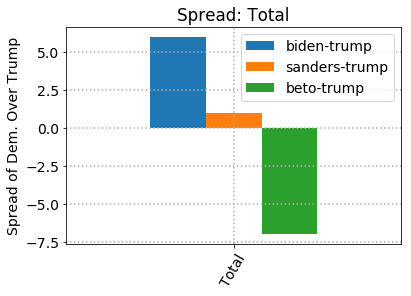

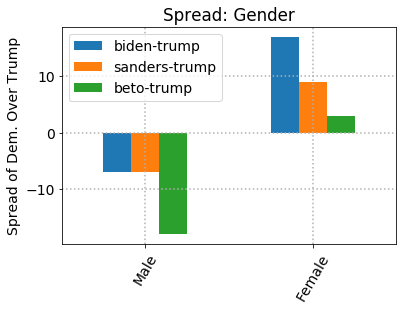

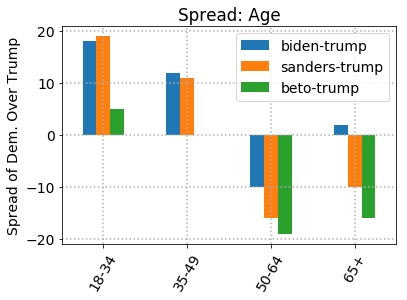

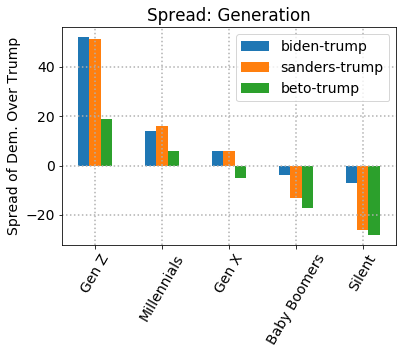

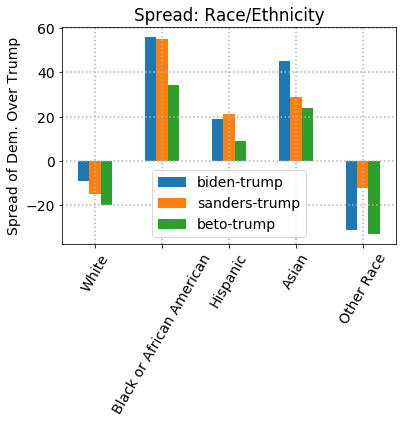

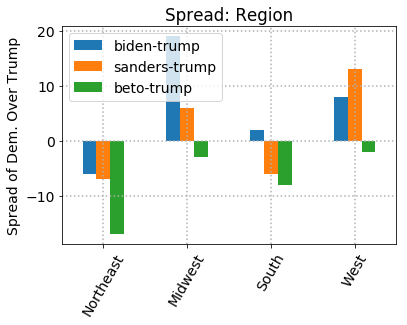

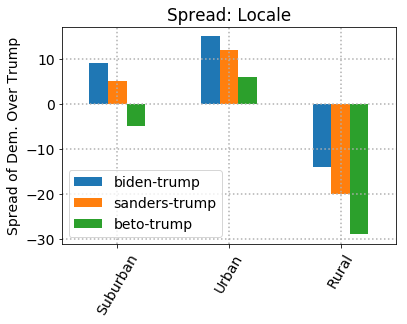

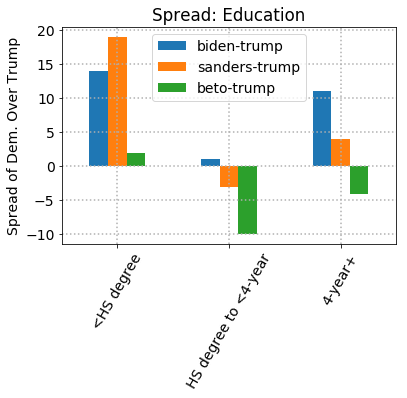

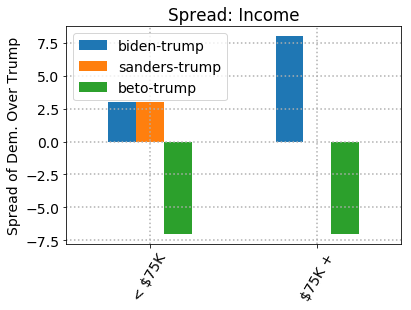

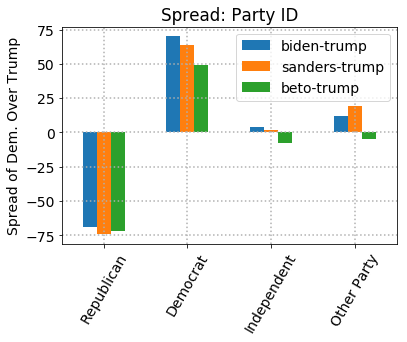

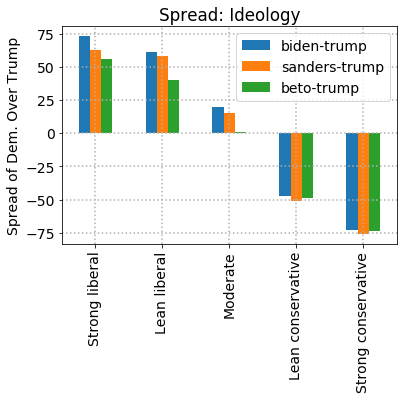

In [7]:
# Spread version      *** Click the sidebar below 'In' to expand figure window
plot_categories(df_spread,'spread')

<Figure size 432x288 with 0 Axes>

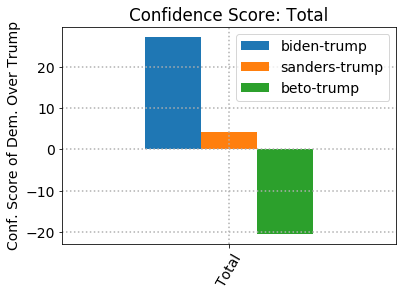

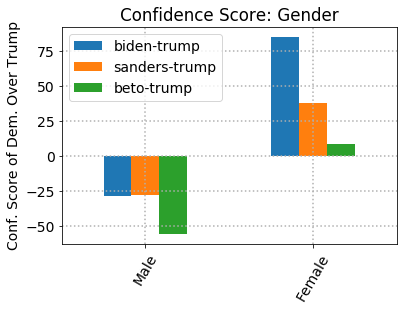

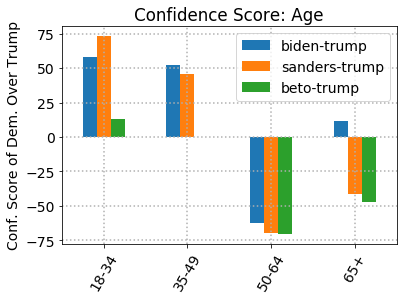

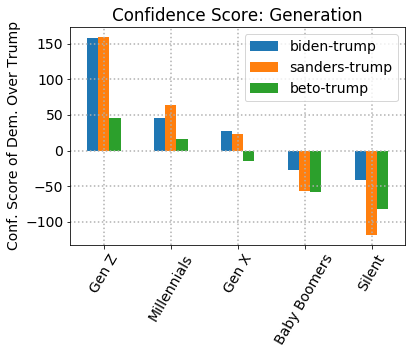

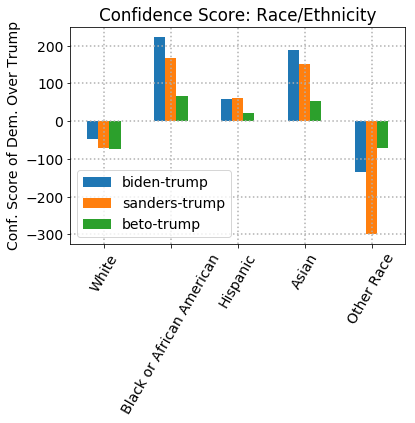

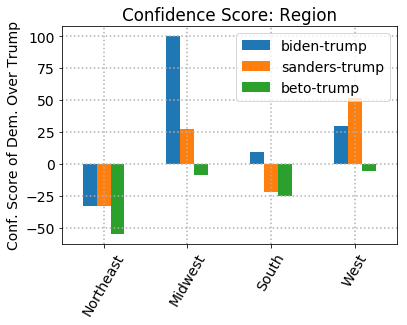

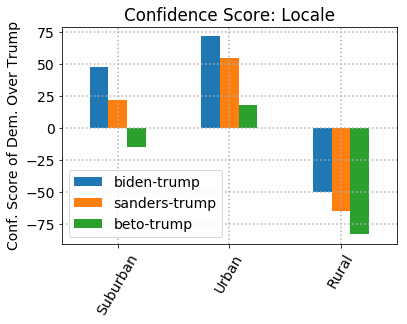

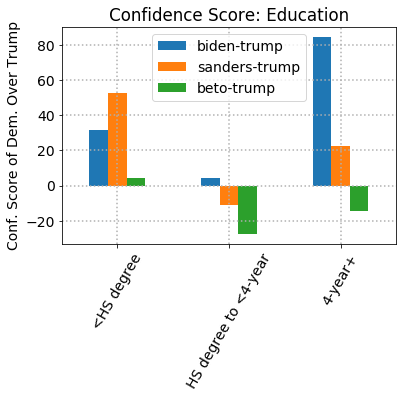

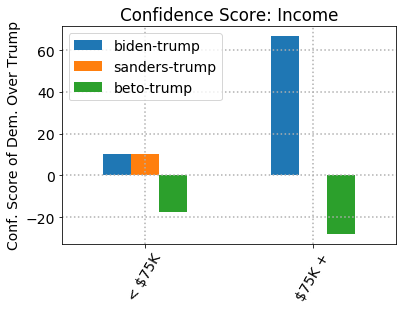

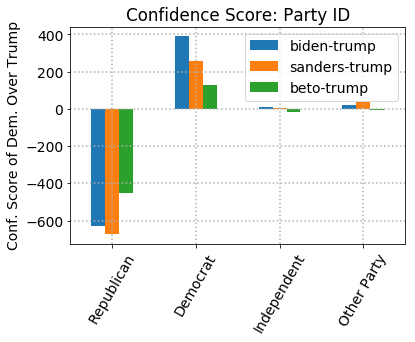

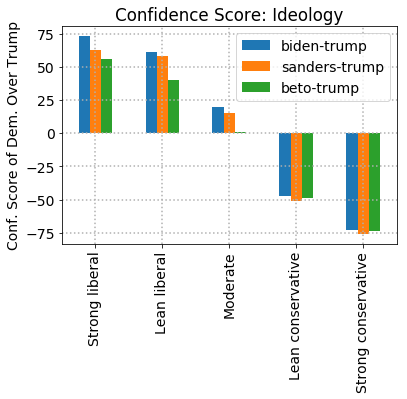

In [8]:
# Confidence Score version     *** Click the sidebar below 'In' to expand figure window
plot_categories(df_conf,'conf')

<Figure size 432x288 with 0 Axes>

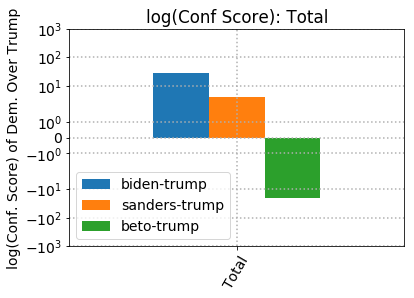

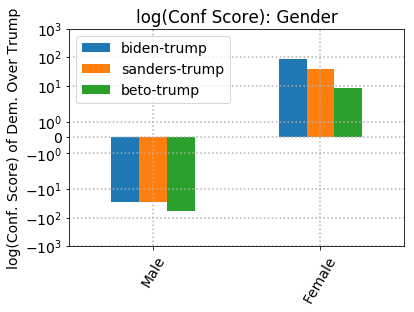

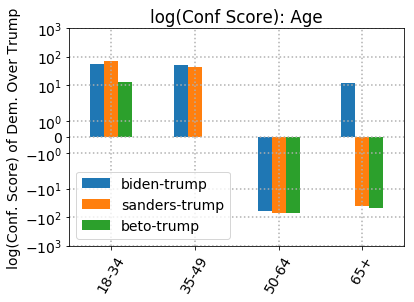

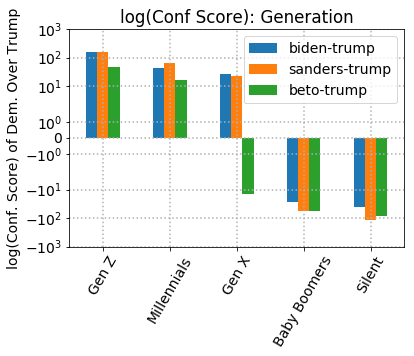

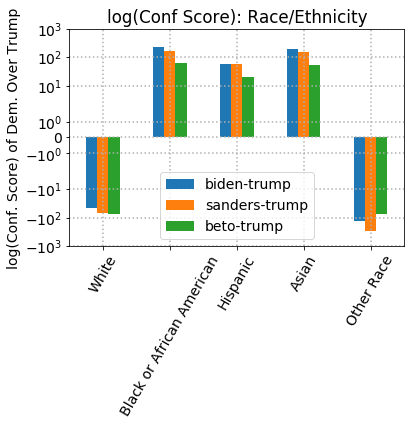

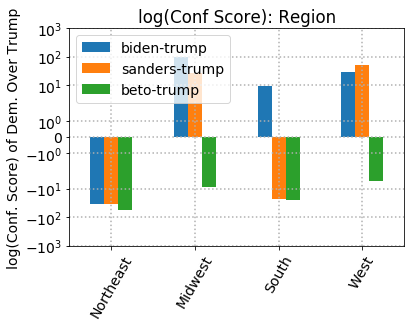

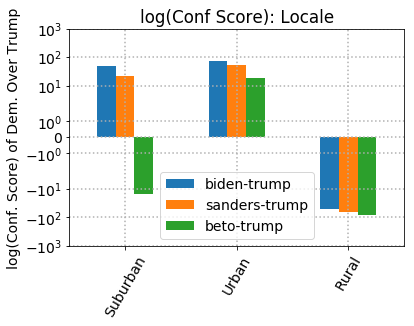

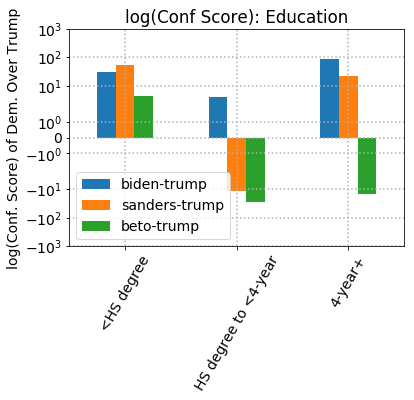

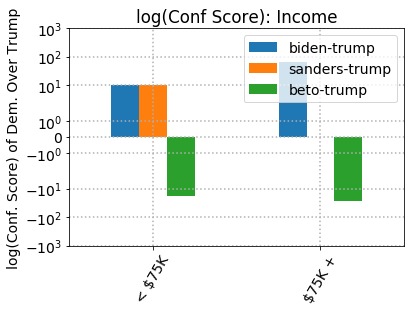

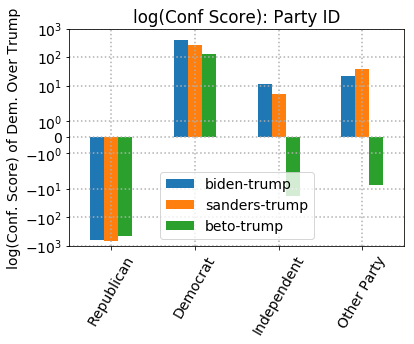

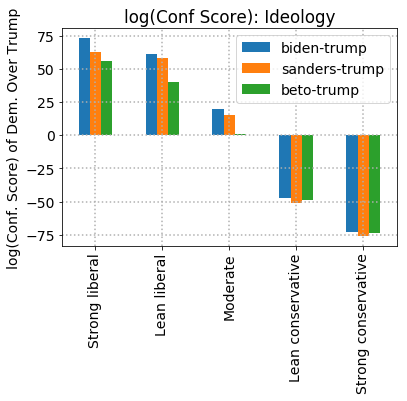

In [9]:
# Confidence Score version            *** Click the sidebar below 'In' to expand figure window
plot_categories(df_conf,'log')

#### -> Some quick takeaways by demographic group
1. Overall
    - Biden is favored over Trump
    - Sanders is marginally favored over Trump
    - Trump is favored over Beto
2. Gender 
    - Males favor Trump, especially over Beto
    - Females ordered preference is Biden, Sanders, Beto, Trump
3. Age
    - 18-34: Strongly democratic favoring Sanders over Biden, with Beto slightly behind
    - 35-49: Strongly democratic with the exception of Beto being even with Trump
    - 50-64: Strongly favor Trump
    - 65+: Only favor Biden as democrat. Trump strongly over Sanders and Beto
4. Generation
    - Gen Z: Strongly democratic, with Beto slightly behind
    - Millennials: Slightly less leaning democratic, Sanders leads
    - Gen X: Favors Biden and Sanders but Trump over Beto
    - Baby Boomers: Strongly favor Trump
    - Silent: Strongly favor Trump, more than any other generation
5. Race/Ethnicity
    - White: Slightly favor Trump mostly over Beto, then Sanders, then Biden
    - Black or African American: Strongly democratic favoring Biden, with Beto slightly behind
    - Hispanic: Lean democratic, less so with Beto
    - Asian: Strongly democratic favoring Biden, Sanders, then Beto
    - Other Race: Strongly favor Trump, very much so against Sanders
6. Region
    - Northeast:
    - Midwest:
    - South:
    - West: 
7. Locale
    - Suburban:
    - Urban: 
    - Rural:
8. Education: 
    - <HS degree:
    - HS degree to <4-year:
    - 4-year+:
9. Income
    - <75K
    - >75K
10. Party ID
    - Republican:
    - Democrat:
    - Independent:
    - Other Party:
11. Ideology 
    - Strong liberal:
    - Lean liberal:
    - Moderate:
    - Lean conservative:
    - Strong conservative:
    
### 3) A natural next step would be to identify voter types by grouping similar demographics.
To do so, I will use the KMeans algorithm as well as hierarchical clustering to assign a grouping to each demographic group based on the multidimensional "distance" between spreads or confidence scores. For example, consider the spreads of these three groups:

In [10]:
df_spread.loc[['Male','Baby Boomers','Asian'],:]

,biden-trump,sanders-trump,beto-trump
Male,-7,-7,-18
Baby Boomers,-4,-13,-17
Asian,45,29,24


Males and Baby Boomers has similar values for their spreads across each candidate pair. In contrast, Asian is very different from both. 

This methodology will weight each candidate pairing equally and is impartial to the relative values between candidates (the distance of 'biden-trump' is measured independently from 'sanders-trump' and 'beto-trump'). Thus the similarity is a function of the independent pairing which allows for party 'disloyalty'. 

In [11]:
# Function that runs KMeans algorithm, returns a modified dataframe with assignments,
# optionally prints summary of clusters, and visualizes result as 2D or 3D scatter plot

def run_kmeans(df, k=5, print_clusters=True, plot='2D',return_df=False):
    # import pandas, KMeans
    import pandas as pd
    from sklearn.cluster import KMeans
    
    # create kmeans object and fit to data
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    # save location of cluster centroids learned by kmeans object
    centroids = kmeans.cluster_centers_
    
    # save the cluster assignments as a series
    s = pd.Series(kmeans.labels_)
    # add the values of this series to the df
    df = df.assign(cluster=s.values)
    # create groupby object to view by cluster
    grouped = df.groupby('cluster').mean()
    
    # Optional feature to print cluster detail
    if print_clusters:
        
        # print cluster summary
        print('-----------------------------------------------------')
        print('KMEANS SUMMARY - MEAN SPREADS')
        print('-----------------------------------------------------')
        print(grouped)
        print()
        # print cluster summary
        print('CLUSTER MEMBER DETAILS')
        print('--------------------------------------------------------------------------')
        for i in range(len(centroids)):
            print('Cluster: '+str(i))
            print('--------------------------------------------------------------------------')
            print(df[df['cluster']==i])
            print()
            print('--------------------------------------------------------------------------')
    
    # import: mcols for custom colormap, matplotlib
    import matplotlib.colors as mcols
    # define a colormap for plots using a list of custom colors
    cmap = mcols.ListedColormap(['g','cyan','r','orange','purple'])
    
    # 2-D plots
    if plot=='2D':
        def plot_scatter(x_index,y_index):
            import matplotlib.pyplot as plt
            plt.figure(figsize=(6,6))
            # first plot the spreads as a scatter plot
            plt.scatter(df.iloc[:,x_index], df.iloc[:,y_index], 
                        cmap=cmap, c=kmeans.labels_,alpha=.3)
            # add the centroid locations for each cluster
            plt.scatter(centroids[:,x_index], centroids[:,y_index],marker='x', 
                        s=200, linewidths=10,cmap=cmap,c=range(k), zorder=10)
            plt.xlim((-80,80))
            plt.ylim((-80,80))
            plt.title("K-means Clustering on Demographic Groups")
            plt.xlabel(df.columns[x_index])
            plt.ylabel(df.columns[y_index])
            
            # draw diagonal line from (70, 90) to (90, 200)
            plt.annotate("",
              xy=(-100, -100), xycoords='data',
              xytext=(100, 100), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              connectionstyle="arc3,rad=0."),)
                        
            # Add diagonal line for reference
            plt.plot([-100, 100], [-100, 100], color='black', linestyle='--', linewidth=1)
            plt.show()
        
        # Repeat for different candidate comparisons
        plot_scatter(0,1)
        plot_scatter(0,2)
        plot_scatter(1,2)

    # 3-D plots
    if plot=='3D':
        import matplotlib.pyplot as plt
        import matplotlib
        from mpl_toolkits.mplot3d import Axes3D
        %matplotlib inline
        matplotlib.rcParams.update({'font.size': 13})
        
        threedee = plt.figure(figsize=(15,15)).gca(projection='3d')
        threedee.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=kmeans.labels_,cmap=cmap,alpha=.3)
        threedee.scatter(centroids[:,0],centroids[:,1], centroids[:,2],
                marker='o', s=169, linewidths=15,cmap=cmap,c=range(k))
        threedee.set_xlabel(df.columns[0])
        threedee.set_ylabel(df.columns[1])
        threedee.set_zlabel(df.columns[2])
        threedee.set_title("K-means Clustering on Demographic Groups")
        plt.show()
        
    if return_df:
        return df
    else: return

In [12]:
# Function that runs hierarchical clustering algorithm, returns a modified dataframe with assignments,
# optionally prints summary of clusters, and visualizes result as 2D or 3D scatter plot

def run_heirarchy(df, n=5, print_clusters=True, plot='2D',plot_dendrogram=False,return_df=False):
    # import pandas
    import pandas as pd
    
    # import hierarchical clustering libraries
    import scipy.cluster.hierarchy as sch
    from sklearn.cluster import AgglomerativeClustering
    
    # plot dendrogram
    if plot_dendrogram:
        import matplotlib.pyplot as plt
        plt.figure(1, figsize=(10, 10))
        plt.title('Hierarchical Clustering of Demographic Groups - Dendogram')
        dendrogram = sch.dendrogram(sch.linkage(df, method='ward'),labels=df.index,color_threshold=55,
                                    leaf_rotation=0,leaf_font_size=10,orientation='left')
    
    # create clusters
    hc = AgglomerativeClustering(n_clusters=n, affinity = 'euclidean', linkage = 'ward')
    # save clusters for chart
    clusters = hc.fit_predict(df)

    # save the cluster assignments as a series
    s = pd.Series(clusters)
    # add the values of this series to the df
    df = df.assign(cluster=s.values)
    # create groupby object to view by cluster
    grouped = df.groupby('cluster').mean()
    
    # Optional feature to print cluster detail
    if print_clusters:  
        # print cluster summary
        print('-----------------------------------------------------')
        print('HIERARCHICAL CLUSTERING SUMMARY - MEAN SPREADS')
        print('-----------------------------------------------------')
        print(grouped)
        print()
        # print cluster summary
        print('CLUSTER MEMBER DETAILS')
        print('--------------------------------------------------------------------------')
        for i in range(n):
            print('Cluster: '+str(i))
            print('--------------------------------------------------------------------------')
            print(df[df['cluster']==i])
            print()
            print('--------------------------------------------------------------------------')
    
    # import: mcols for custom colormap, matplotlib
    import matplotlib.colors as mcols
    # define a colormap for plots using a list of custom colors
    cmap = mcols.ListedColormap(['g','cyan','r','orange','purple'])
    
    # 2-D plots
    if plot=='2D':
        def plot_scatter(x_index,y_index):
            import matplotlib.pyplot as plt
            plt.figure(figsize=(6,6))
            # plot the spreads as a scatter plot
            plt.scatter(df.iloc[:,x_index], df.iloc[:,y_index], 
                        cmap=cmap, c=df['cluster'],alpha=.5)
            plt.xlim((-80,80))
            plt.ylim((-80,80))
            plt.title("Hierarchical Clustering on Demographic Groups")
            plt.xlabel(df.columns[x_index])
            plt.ylabel(df.columns[y_index])
            
            # Add diagonal line for reference
            plt.plot([-100, 100], [-100, 100], color='black', linestyle='--', linewidth=1)
            plt.show()
        
        # Repeat for different candidate comparisons
        plot_scatter(0,1)
        plot_scatter(0,2)
        plot_scatter(1,2)

    # 3-D plots
    if plot=='3D':
        import matplotlib.pyplot as plt
        import matplotlib
        from mpl_toolkits.mplot3d import Axes3D
        %matplotlib inline
        matplotlib.rcParams.update({'font.size': 13})
        # 
        threedee = plt.figure(figsize=(15,15)).gca(projection='3d')
        threedee.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=df['cluster'],cmap=cmap,alpha=.4)
        #threedee.scatter(centroids[:,0],centroids[:,1], centroids[:,2],
        #        marker='o', s=169, linewidths=15,cmap=cmap,c=range(k))
        threedee.set_xlabel(df.columns[0])
        threedee.set_ylabel(df.columns[1])
        threedee.set_zlabel(df.columns[2])
        threedee.set_title("Hierarchical Clustering on Demographic Groups")
        plt.show()
    
    if return_df:
        return df
    else: return

In [13]:
# Run the kmeans/heirarchical clustering algorithms on a spread basis
# Assignments are nearly (if not perfectly) identical between methods

run_heirarchy(df_spread,plot='none')

-----------------------------------------------------
HIERARCHICAL CLUSTERING SUMMARY - MEAN SPREADS
-----------------------------------------------------
         biden-trump  sanders-trump  beto-trump
cluster                                        
0          59.500000      53.333333   37.000000
1          -9.555556     -14.000000  -21.888889
2         -63.000000     -67.000000  -65.000000
3          15.272727      14.545455    2.000000
4           5.555556       1.333333   -6.777778

CLUSTER MEMBER DETAILS
--------------------------------------------------------------------------
Cluster: 0
--------------------------------------------------------------------------
                           biden-trump  sanders-trump  beto-trump  cluster
Gen Z                               52             51          19        0
Black or African American           56             55          34        0
Asian                               45             29          24        0
Democrat                

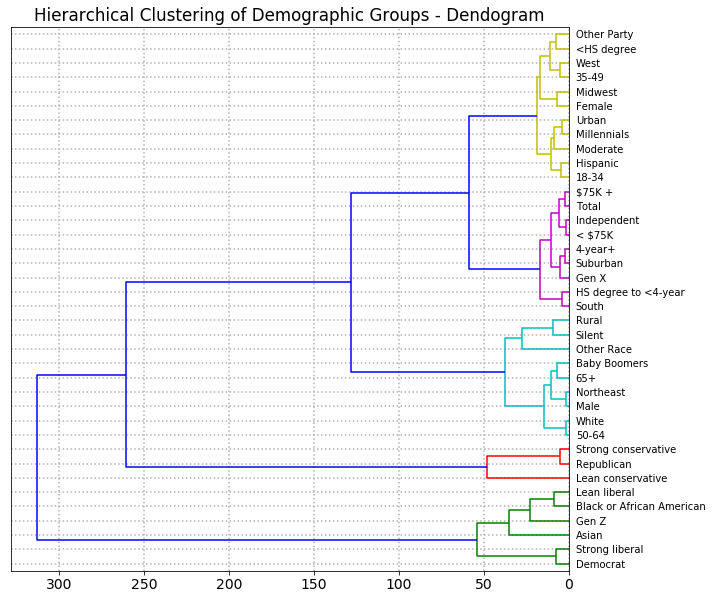

In [14]:
# View dendrogram from heirarchical clustering
run_heirarchy(df_spread,print_clusters=False,plot='none',plot_dendrogram=True)

#### -> So there are clearly defined clusters of these demographic groups, each with associated mean values for the spread or confidence score. We can plot the centroids of these clusters and their members as a scatter plot with a candidate pairing on each axis. A 'tighter' line indicates high similarity between democratic candidates while points far from the line (y=x) indicate a that a demographic group has a  preference of one democratic candidate over another. 

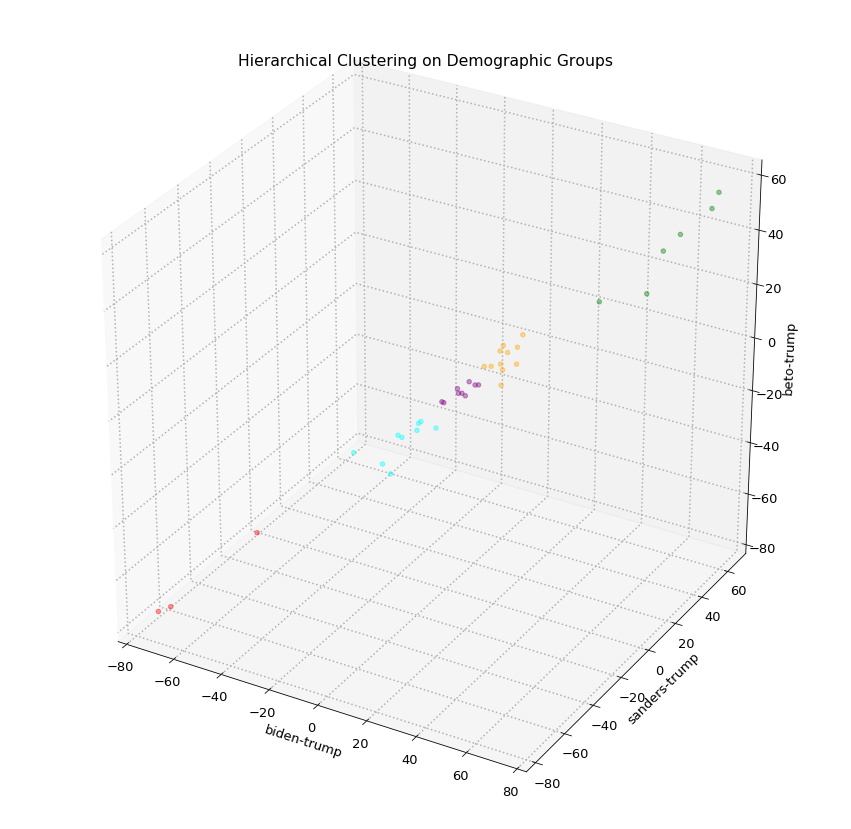

In [15]:
# 3D Visualizarion of the Clusters 
df_km = run_heirarchy(df_spread,print_clusters=False,plot='3D')

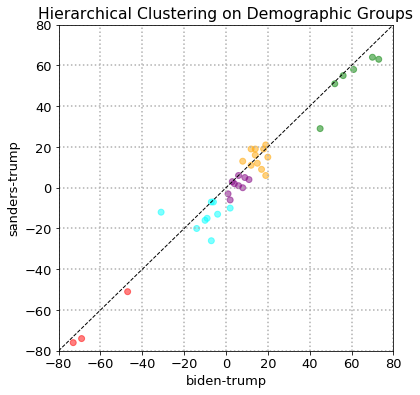

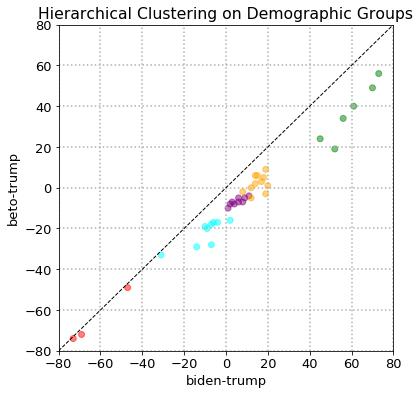

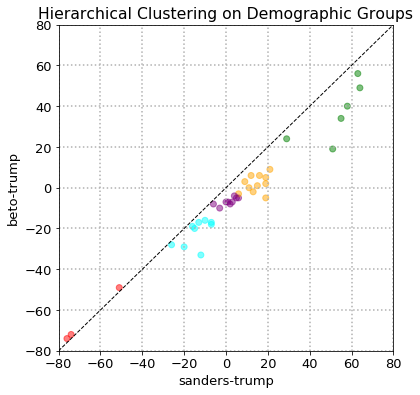

In [16]:
# 2D Visualization of the Clusters 
df_hc = run_heirarchy(df_spread,print_clusters=False,plot='2D',return_df=True)

#### -> As we might have expected, there is a voter group centered at either extreme (strongly Trump / strongly Dem) around a more crowded middle area. A 5 cluster grouping suggests that these middle clusters can be considered to be leaning towards the Democratic candidate, leaning Trump, or neither. 
#### -> From the first plot, we can see that groups are somewhat split in their support of Biden vs Sanders. Biden seems to do slightly better in every cluster except leaning Democratic (gold) with a few exceptions.
#### -> We can also observe that Beto compares relatively poorly against both Biden and Sanders, indicated by the majority of points falling below the diagonal line.


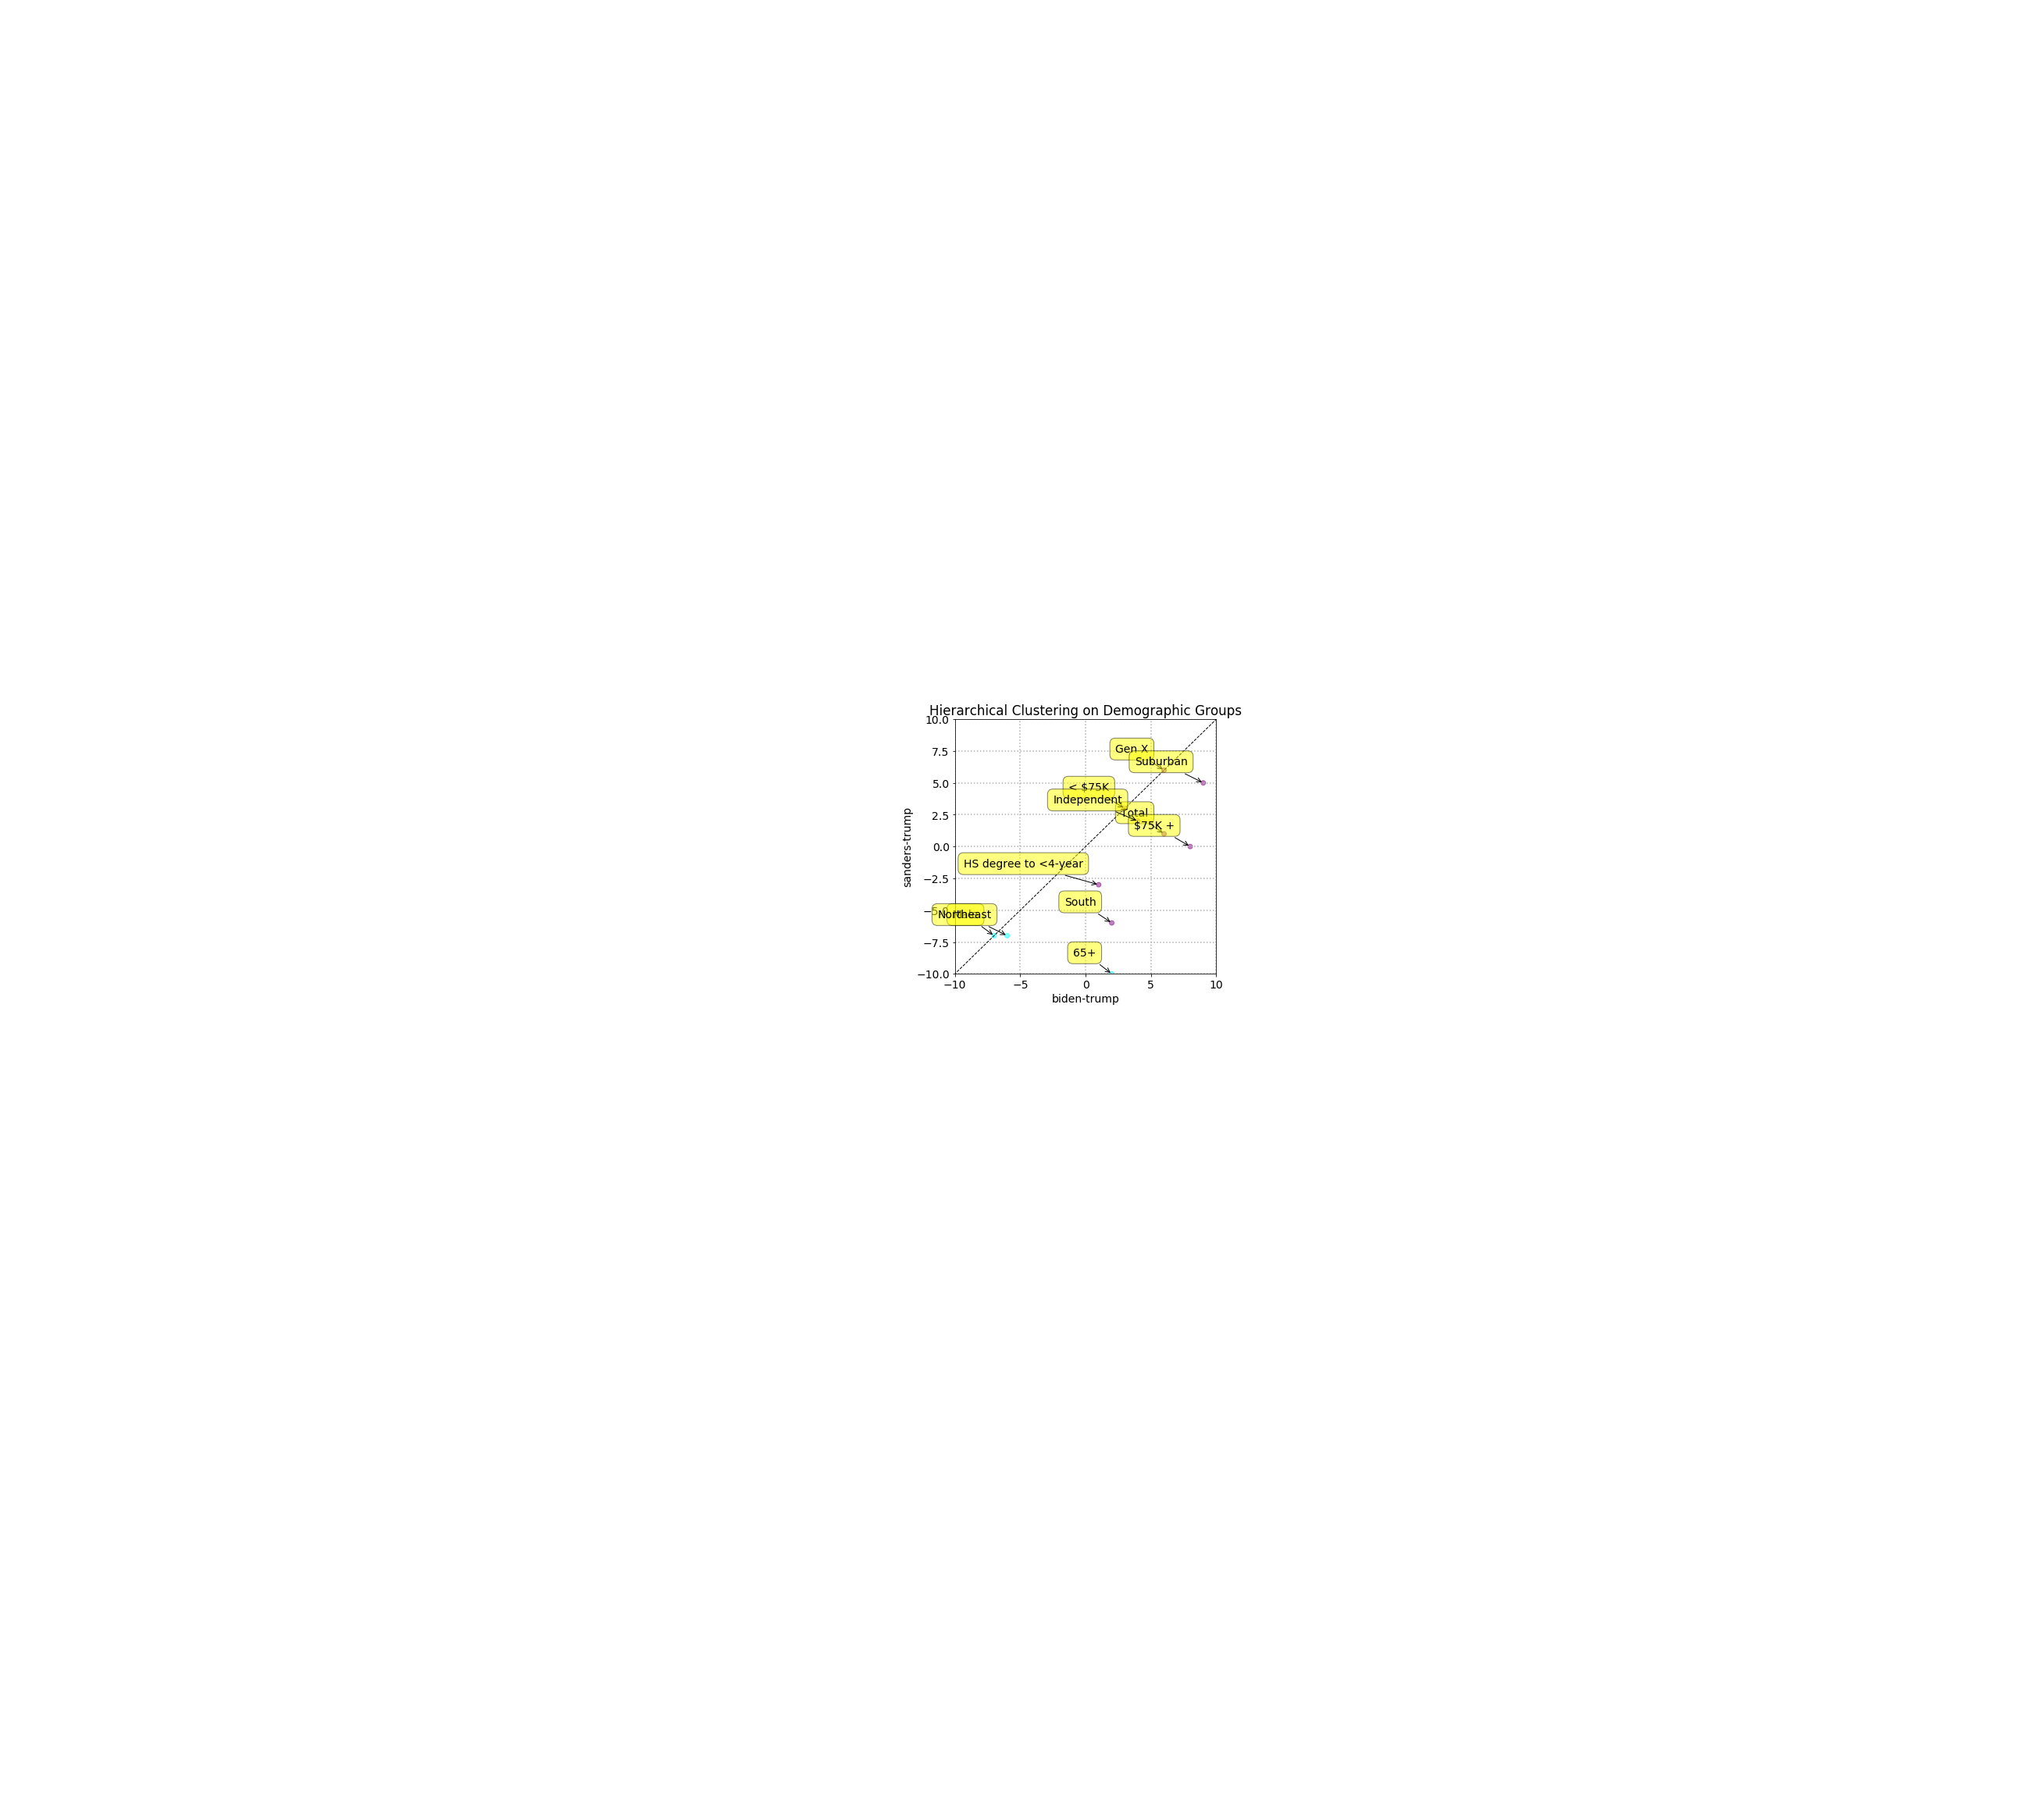

In [17]:
# A closer look at the groups with < 20 pt spread (Biden vs Sanders)

# import: mcols for custom colormap, matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcols
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14,'figure.figsize':(1,1),'axes.grid':'true',
                                'grid.linestyle':':','grid.linewidth':1.5,'grid.alpha':1})


# define a colormap for plots using a list of custom colors
cmap = mcols.ListedColormap(['g','cyan','r','orange','purple'])
        
plt.figure(figsize=(6,6))
# plot the spreads as a scatter plot
plt.scatter(df_hc.iloc[:,0], df_hc.iloc[:,1], 
            cmap=cmap, c=df_hc['cluster'],alpha=.5)
plt.xlim((-10,10))
plt.ylim((-10,10))
plt.title("Hierarchical Clustering on Demographic Groups")
plt.xlabel(df_hc.columns[0])
plt.ylabel(df_hc.columns[1])

labels = df_hc.index
for label, x, y in zip(labels, df_hc.iloc[:, 0], df_hc.iloc[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), 
        xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# Add diagonal line for reference
plt.plot([-100, 100], [-100, 100], color='black', linestyle='--', linewidth=1)
plt.show()


# Not sure why this is coming out so tiny...

#### -> More to come